In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [37]:
import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train.shape

(379, 104)

In [38]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.952051960903273

In [39]:
model.score(X_test, y_test)

0.6074721959665854

In [40]:
model_ridge = Ridge().fit(X_train, y_train)

print('훈련점수:', model_ridge.score(X_train, y_train))
print('테스트점수:', model_ridge.score(X_test, y_test))

훈련점수: 0.885796658517094
테스트점수: 0.752768348174475


In [41]:
model_ridge_10 = Ridge(alpha=10).fit(X_train, y_train)

print('훈련점수:', model_ridge_10.score(X_train, y_train))
print('테스트점수:', model_ridge_10.score(X_test, y_test))

훈련점수: 0.7882787115369614
테스트점수: 0.6359411489177311


In [42]:
model_ridge_01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('훈련점수:', model_ridge_01.score(X_train, y_train))
print('테스트점수:', model_ridge_01.score(X_test, y_test))

훈련점수: 0.9282273685001987
테스트점수: 0.7722067936479647


(-25.0, 25.0)

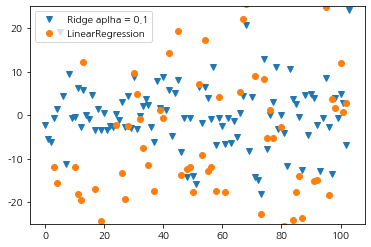

In [43]:
# coef_ 가중치 , intercept_ 편향
plt.plot(model_ridge_01.coef_, 'v', label = 'Ridge aplha = 0.1')
plt.plot(model.coef_, 'o', label = 'LinearRegression')
plt.legend()
plt.ylim(-25,25)

In [44]:
from sklearn.linear_model import Lasso

# lasso
model_lasso = Lasso().fit(X_train, y_train)

print('훈련점수:', model_lasso.score(X_train, y_train))
print('테스트점수:', model_lasso.score(X_test, y_test))
print('사용한 특성 수:', np.sum( model_lasso.coef_ != 0 ) )

훈련점수: 0.29323768991114607
테스트점수: 0.20937503255272294
사용한 특성 수: 4


In [45]:
model_lasso_001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print('훈련점수:', model_lasso_001.score(X_train, y_train))
print('테스트점수:', model_lasso_001.score(X_test, y_test))
print('사용한 특성 수:', np.sum( model_lasso_001.coef_ != 0 ) )

훈련점수: 0.8962226511086497
테스트점수: 0.7656571174549983
사용한 특성 수: 33


In [46]:
model_lasso_001.coef_.shape

(104,)

In [47]:
model_lasso_00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print('훈련점수:', model_lasso_00001.score(X_train, y_train))
print('테스트점수:', model_lasso_00001.score(X_test, y_test))
print('사용한 특성 수:', np.sum( model_lasso_00001.coef_ != 0 ) )

훈련점수: 0.9507158754515467
테스트점수: 0.6437467421272711
사용한 특성 수: 96


(-25.0, 25.0)

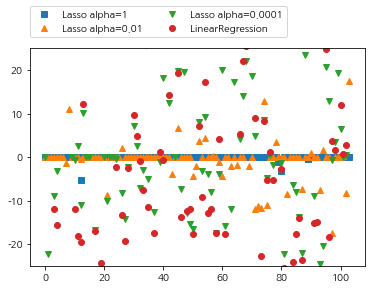

In [48]:
plt.plot(model_lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(model_lasso_001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(model_lasso_00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(model.coef_, 'o', label='LinearRegression')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)

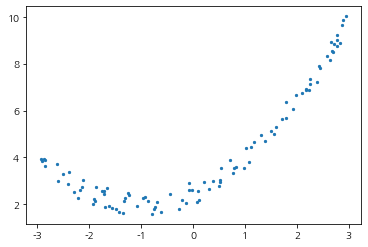

In [100]:
# 다항 회귀
n = 100
# random.rand n행, 1열 
x = 6*np.random.rand(n,1) -3
y = 0.5 * x**2 +1*x +2+np.random.rand(n,1)
plt.scatter(x, y, s=5)


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x.shape, x_poly.shape

((100, 1), (100, 2))

In [102]:
# x주어지면 x, x**2
x[0:5], x_poly[0:5]

(array([[ 1.17806093],
        [-0.73348896],
        [-1.92237793],
        [-2.85192763],
        [-2.59650221]]),
 array([[ 1.17806093,  1.38782756],
        [-0.73348896,  0.53800606],
        [-1.92237793,  3.69553692],
        [-2.85192763,  8.1334912 ],
        [-2.59650221,  6.74182373]]))

In [103]:
poly_features

PolynomialFeatures(include_bias=False)

In [104]:
x[0], x_poly[0]

(array([1.17806093]), array([1.17806093, 1.38782756]))

In [105]:
model = LinearRegression().fit(x_poly, y)
model.coef_, model.intercept_

(array([[0.98222473, 0.50463411]]), array([2.45395074]))

In [106]:
model_line = LinearRegression().fit(x,y)

In [107]:
model_lr = make_pipeline(poly_features, LinearRegression())
model_lr.fit(x, y)
model_lr.steps[1][1].coef_, model_lr.steps[1][1].intercept_

(array([[0.98222473, 0.50463411]]), array([2.45395074]))

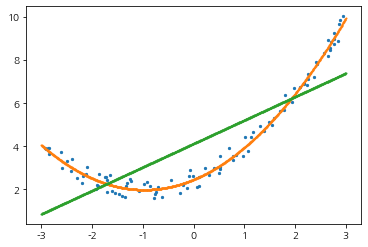

In [108]:
# 다항회귀 그래프
plt.scatter(x, y, s=5)
xx = np.linspace(-3,3,1000)
yy = model_lr.predict(xx.reshape(-1,1))
y_line = model_line.predict(xx[:,np.newaxis])
plt.scatter(xx, yy, s=1)
plt.scatter(xx, y_line, s=1)

In [84]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [85]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [91]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

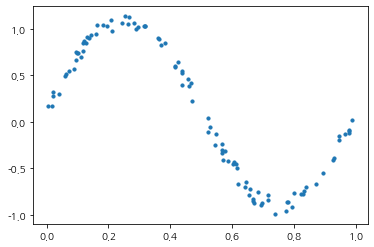

In [92]:
import pandas as pd
import seaborn as sb

np.random.seed(0)
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.sin(2* np.pi * X) + np.random.rand(n_samples)*0.2
plt.scatter(X, y, s=10)

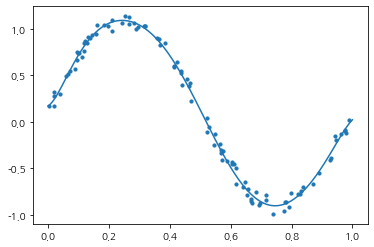

In [93]:
model_lr = make_pipeline(PolynomialFeatures(9), LinearRegression())
model_lr.fit(X.reshape(-1,1), y)

xx = np.linspace(0,1,1000)
yy = model_lr.predict(xx[:,np.newaxis])
plt.plot(xx,yy)
plt.scatter(X, y, s=10)

array([ 0.        ,  0.94988354, -3.22131047, -2.23763995, -0.62781568,
        0.49755131,  1.06942182,  1.23494169,  1.14389795,  0.90697275])

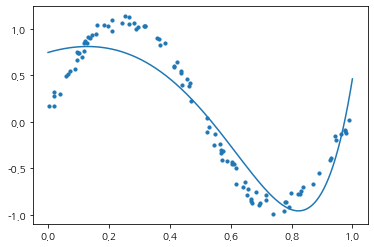

In [95]:
model_ridge = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.1))
model_ridge.fit(X.reshape(-1, 1), y)

xx = np.linspace(0, 1, 1000)
yy = model_ridge.predict(xx[:, np.newaxis])
plt.plot(xx, yy)
plt.scatter(X, y, s=10)
model_ridge.steps[1][1].coef_

C:\Users\woosung\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03594071510135244, tolerance: 0.0048618565892925205
  model = cd_fast.enet_coordinate_descent(


array([  0.        ,   4.18108172, -10.01431206,  -0.        ,
         0.        ,   1.85974242,   3.92550755,   0.        ,
         0.        ,   0.        ])

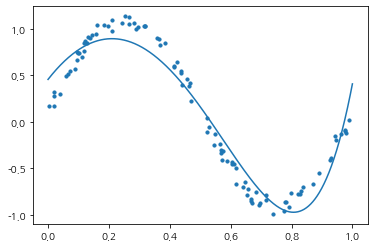

In [96]:
model_lasso = make_pipeline(PolynomialFeatures(9), Lasso(alpha=0.001))
model_lasso.fit(X.reshape(-1, 1), y)

xx = np.linspace(0, 1, 1000)
yy = model_lasso.predict(xx[:, np.newaxis])
plt.plot(xx, yy)
plt.scatter(X, y, s=10)
model_lasso.steps[1][1].coef_

array([ 0.        , -0.76935476, -1.50520231, -0.56312049, -0.        ,
        0.        ,  0.        ,  0.40179181,  0.66175708,  0.81938881])

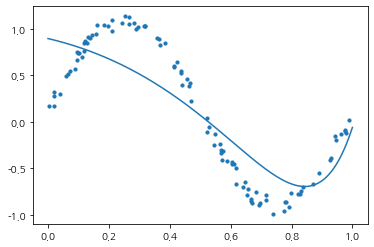

In [97]:
model_el = make_pipeline(PolynomialFeatures(9),
                         ElasticNet(alpha=0.01, l1_ratio=0.5))
model_el.fit(X.reshape(-1, 1), y)

xx = np.linspace(0, 1, 1000)
yy = model_el.predict(xx[:, np.newaxis])
plt.plot(xx, yy)
plt.scatter(X, y, s=10)
model_el.steps[1][1].coef_